In [1]:
import os
os.getcwd()

'd:\\Python_MachineLearning_Proj\\Time Series'

In [2]:
os.chdir(r"C:\Users\thars\Downloads")

In [3]:
# import pandas library
import pandas as pd
stocks_data = pd.read_csv(r"C:\Users\thars\Downloads\stocks\stocks.csv")
print(stocks_data)

    Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  64120100  
2    150.639999  56007100  

In [4]:
# Let's proceed 
stocks_data["Date"] = pd.to_datetime(stocks_data["Date"])

# let's check missing values
missing_values = stocks_data.isnull().sum()

# let's check unique stocks
unique_stocks = stocks_data["Ticker"].value_counts()

print(missing_values)


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
print(unique_stocks)

Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64


In [6]:
# check the time range of the dataset
time_range = stocks_data["Date"].min(), stocks_data["Date"].max()
print(time_range)

(Timestamp('2023-02-07 00:00:00'), Timestamp('2023-05-05 00:00:00'))


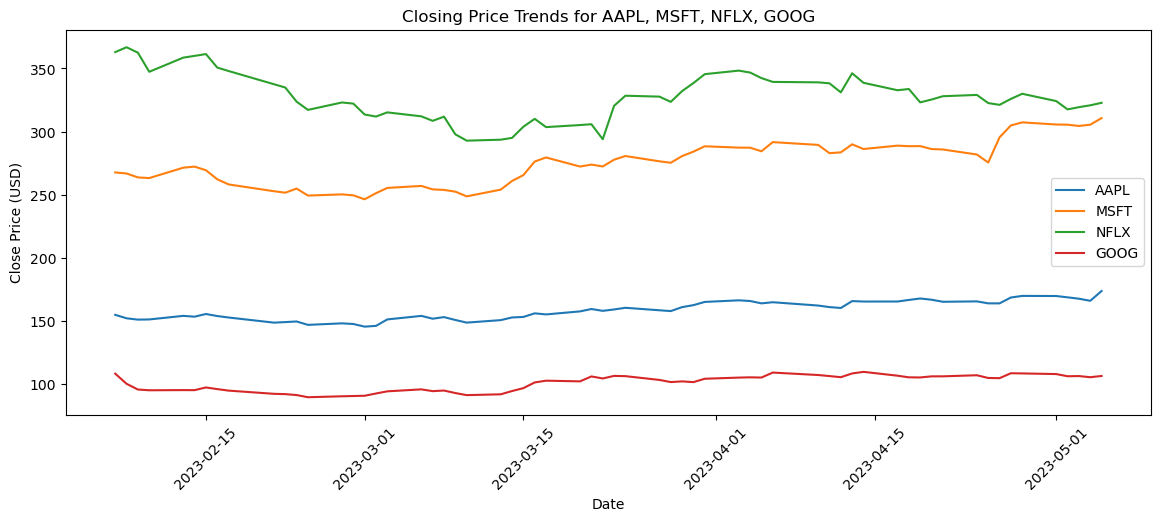

In [7]:
# Now let's plot the closing price trends for each stocks:
import matplotlib.pyplot as plt

plt.style.use = ("seaborn-darkgrid")

fig, ax = plt.subplots(figsize=(14, 5))

for ticker in unique_stocks.index:
    subset = stocks_data[stocks_data["Ticker"] == ticker]
    ax.plot(subset["Date"], subset["Close"], label=ticker)

ax.set_title("Closing Price Trends for AAPL, MSFT, NFLX, GOOG")
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.legend()

plt.xticks(rotation=45)
plt.show()

In [17]:
# we'll start the with the ADF TEST for stationary, let's do this for each stock price closing price
from statsmodels.tsa.stattools import adfuller

# function to perform Augmented Dicky-Fuller test
def adf_test(series, title=""):
    print(f"ADF TEST on '{title}'")
    result = adfuller(series, autolag="AIC")  #ADF TEST
    print(result)
    labels = ["ADF test Statistics", "P-value", "Lags Used", "Number of Observation"]
    out = pd.Series(result[0:4], index=labels)

    for key, value in result[4].items():
        out[f"Critical value {key}"] = value
    print(out.to_string)
    print("\n")
# Perform ADF Test on the Close Price of the each stock
for ticker in unique_stocks.index:
    series = stocks_data[stocks_data["Ticker"] == ticker]["Close"]
    adf_test(series, title=ticker)

ADF TEST on 'AAPL'
(-0.2916929059594763, 0.9266726529518915, 0, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, 225.8916706620293)
<bound method Series.to_string of ADF test Statistics      -0.291693
p-value                   0.926673
laga Used                 0.000000
Number of Observation    61.000000
Critical value 1%        -3.542413
Critical value 5%        -2.910236
Critical value 10%       -2.592745
dtype: float64>


ADF TEST on 'MSFT'
(-0.14980707695390766, 0.944245989051481, 0, 61, {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}, 304.5598140132122)
<bound method Series.to_string of ADF test Statistics      -0.149807
p-value                   0.944246
laga Used                 0.000000
Number of Observation    61.000000
Critical value 1%        -3.542413
Critical value 5%        -2.910236
Critical value 10%       -2.592745
dtype: float64>


ADF TEST on 'NFLX'
(-2.1509264439012976, 0.2245356394880858, 0, 61, 

In [28]:
# differencing the close price of each stock to make them stationary
stocks_data["diff_close"] = stocks_data.groupby("Ticker")["Close"].transform(lambda x: x.diff())

for ticker in unique_stocks.index:
    series = stocks_data[stocks_data["Ticker"] == ticker]["diff_close"].dropna()
    adf_test(series, title=(f"{ticker} - 'Differenced'"))



ADF TEST on 'AAPL - 'Differenced''
(-5.238103734362092, 7.346519564767049e-06, 4, 56, {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}, 217.70001201652872)
<bound method Series.to_string of ADF test Statistics      -5.238104
p-value                   0.000007
laga Used                 4.000000
Number of Observation    56.000000
Critical value 1%        -3.552928
Critical value 5%        -2.914731
Critical value 10%       -2.595137
dtype: float64>


ADF TEST on 'MSFT - 'Differenced''
(-5.89502352629261, 2.8648760892110426e-07, 1, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 296.7306985239139)
<bound method Series.to_string of ADF test Statistics     -5.895024e+00
p-value                  2.864876e-07
laga Used                1.000000e+00
Number of Observation    5.900000e+01
Critical value 1%       -3.546395e+00
Critical value 5%       -2.911939e+00
Critical value 10%      -2.593652e+00
dtype: float64>


ADF TEST 

In [21]:
# Get the value counts of tickers and corresponding Close values
ticker_counts = stocks_data["Ticker"].value_counts()
close_values = stocks_data[["Ticker", "Close"]].drop_duplicates()

# Display ticker counts and their corresponding Close column
result = pd.merge(ticker_counts, close_values, left_index=True, right_on="Ticker")
print(result)

     count Ticker       Close
0       62   AAPL  154.649994
1       62   AAPL  151.919998
2       62   AAPL  150.869995
3       62   AAPL  151.009995
4       62   AAPL  153.850006
..     ...    ...         ...
242     62   GOOG  108.220001
243     62   GOOG  107.709999
244     62   GOOG  105.980003
246     62   GOOG  105.209999
247     62   GOOG  106.214996

[244 rows x 3 columns]


##### Model Training

In [57]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Prepare the dataset for VAR model
var_data = stocks_data.pivot(index="Date", columns="Ticker", values="diff_close").dropna()

model = VAR(var_data)
model_fitted = model.fit(ic="aic")

forecast_steps = 5

forecasted_values = model_fitted.forecast(var_data.values[-model_fitted.k_ar:], steps=forecast_steps)

forecasted_df = pd.DataFrame(forecasted_values, index=pd.date_range(start=var_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'), columns=var_data.columns)

for column in forecasted_df.columns:
    forecasted_df[column] = (stocks_data.groupby("Ticker")["Close"].last()[column] + forecasted_df[column].cumsum())

print(forecasted_df)

Ticker            AAPL        GOOG        MSFT        NFLX
2023-05-06  174.369001  113.624024  320.179608  327.604320
2023-05-07  169.684437  104.915080  318.416783  342.704109
2023-05-08  168.190894  107.828473  329.210732  367.542312
2023-05-09  160.836027   99.287041  326.849012  348.088074
2023-05-10  167.645928  101.392914  317.986680  387.059442


c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


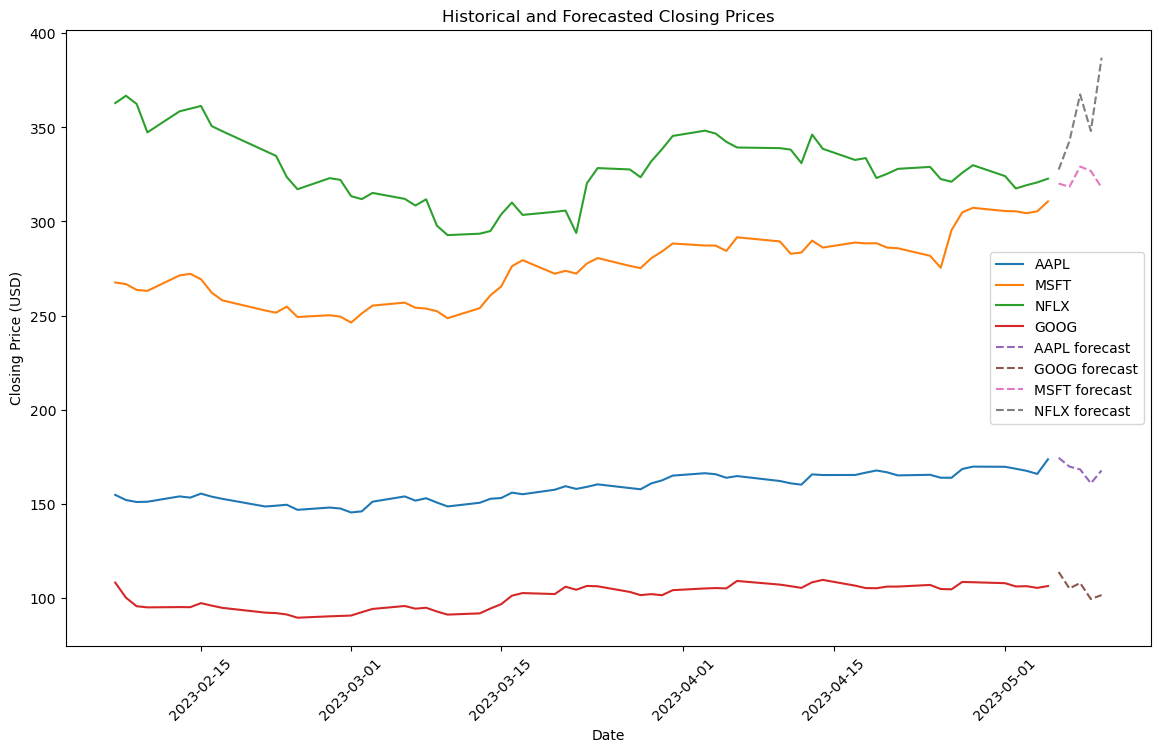

In [67]:
#To wrap up, we’ll visualize the historical closing prices along with the forecasted prices for each stock on a single graph
fig, ax = plt.subplots(figsize=(14, 8))

# Plot historical Closing price for each stock
for ticker in unique_stocks.index:
    historical_data = (stocks_data[stocks_data["Ticker"]==ticker])
    ax.plot(historical_data["Date"], historical_data["Close"], label=ticker)

# Plot forecasted Closing price for each stock
for column in forecasted_df.columns:
    ax.plot(forecasted_df.index, forecasted_df[column], label=f"{column} forecast", linestyle="--")

ax.set_title("Historical and Forecasted Closing Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price (USD)")
ax.legend()

plt.xticks(rotation=45)
plt.show()
